In [284]:
import pandas as pd
import numpy as np
from sklearn.model_selection import *
from sklearn.metrics import *
from sklearn.linear_model import *
from sklearn.metrics import *
import matplotlib.pyplot as plt
from sklearn.naive_bayes import *

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

%pylab inline



Populating the interactive namespace from numpy and matplotlib


In [285]:
pd.set_option('display.max_colwidth', 999)

In [286]:
df= pd.read_csv('data/churn_train.csv')

In [287]:
df['last_trip_date'] = pd.to_datetime(df['last_trip_date']) 

In [288]:
df['LTV']=df['avg_surge']*df['trips_in_first_30_days']*df['avg_dist']
df['miles']=df['trips_in_first_30_days']*df['avg_dist']
df['avg_ride_price']=df['avg_surge']*df['avg_dist']

In [289]:
df.avg_dist[df.avg_dist>40]=40

/Users/Haebichan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [290]:
df['target'] = (df['last_trip_date'] < '2014-06-01') * 1

In [291]:
df['constant'] = 1

In [292]:
#df.join(df['constant'])

In [293]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('target',axis=1), df['target'], test_size = 0.3)

In [295]:
x_train_baseline = pd.DataFrame(x_train[['luxury_car_user', 'trips_in_first_30_days']])#.join(df['constant'])

In [296]:
model = LogisticRegression()
model.fit(x_train_baseline, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [297]:
x_test_baseline = pd.DataFrame(x_test[['luxury_car_user', 'trips_in_first_30_days']]).join(df['constant'])

In [298]:
y_pred = model.predict(x_test_baseline)

ValueError: X has 3 features per sample; expecting 2

In [51]:
confusion_matrix(y_pred, y_test)

array([[1150,  578],
       [3363, 6909]])

In [52]:
x_test_baseline.shape

(12000, 3)

In [125]:
precision_score(y_pred, y_test)

0.90067900412728

In [126]:
recall_score(y_pred, y_test)

0.6623910702046412

In [127]:
accuracy_score(y_pred, y_test)

0.6505

In [18]:
df.corr()['target'].sort_values()

trips_in_first_30_days   -0.210677
luxury_car_user          -0.206902
surge_pct                -0.011551
weekday_pct              -0.008383
avg_surge                 0.003146
avg_rating_of_driver      0.012902
avg_rating_by_driver      0.027461
avg_dist                  0.093371
target                    1.000000
constant                       NaN
Name: target, dtype: float64

In [19]:
df['luxury_car_user'] = df['luxury_car_user'] * 1

(array([ 7402.,   398.,  1259.,  1945.,  1630.,  4882.,  3825.,  2624.,
         2106., 13929.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

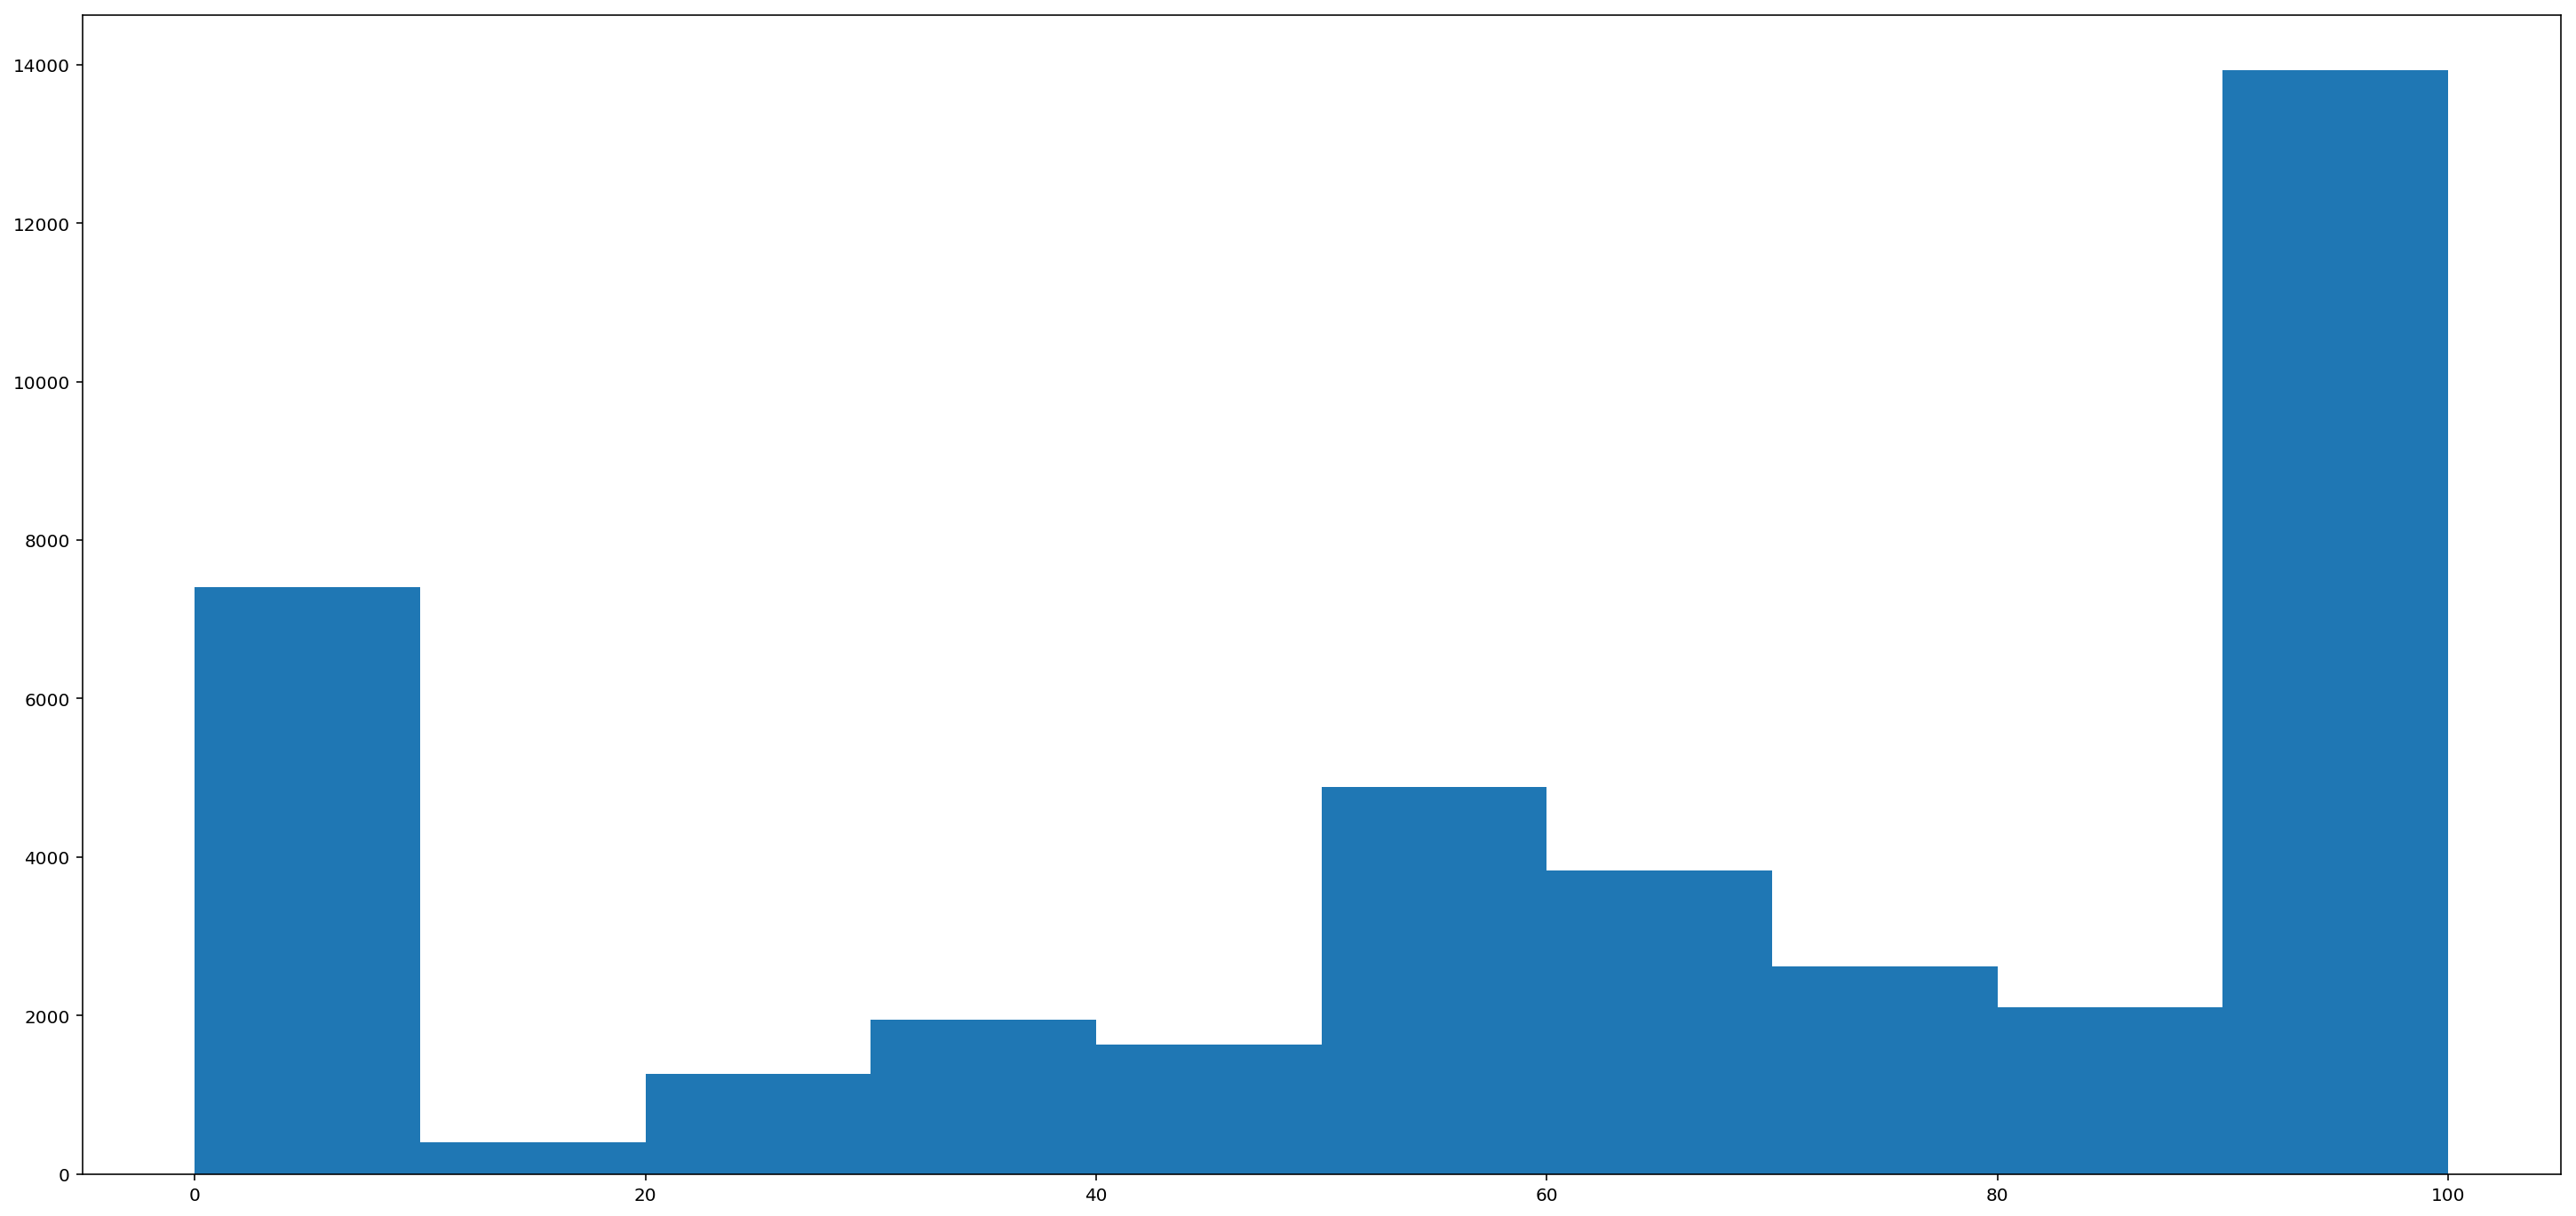

In [58]:
hist(df.weekday_pct)

/Users/Haebichan/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:2918: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=1.0, right=1.0
  'left=%s, right=%s') % (left, right))
/Users/Haebichan/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3239: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=1.0, top=1.0
  'bottom=%s, top=%s') % (bottom, top))


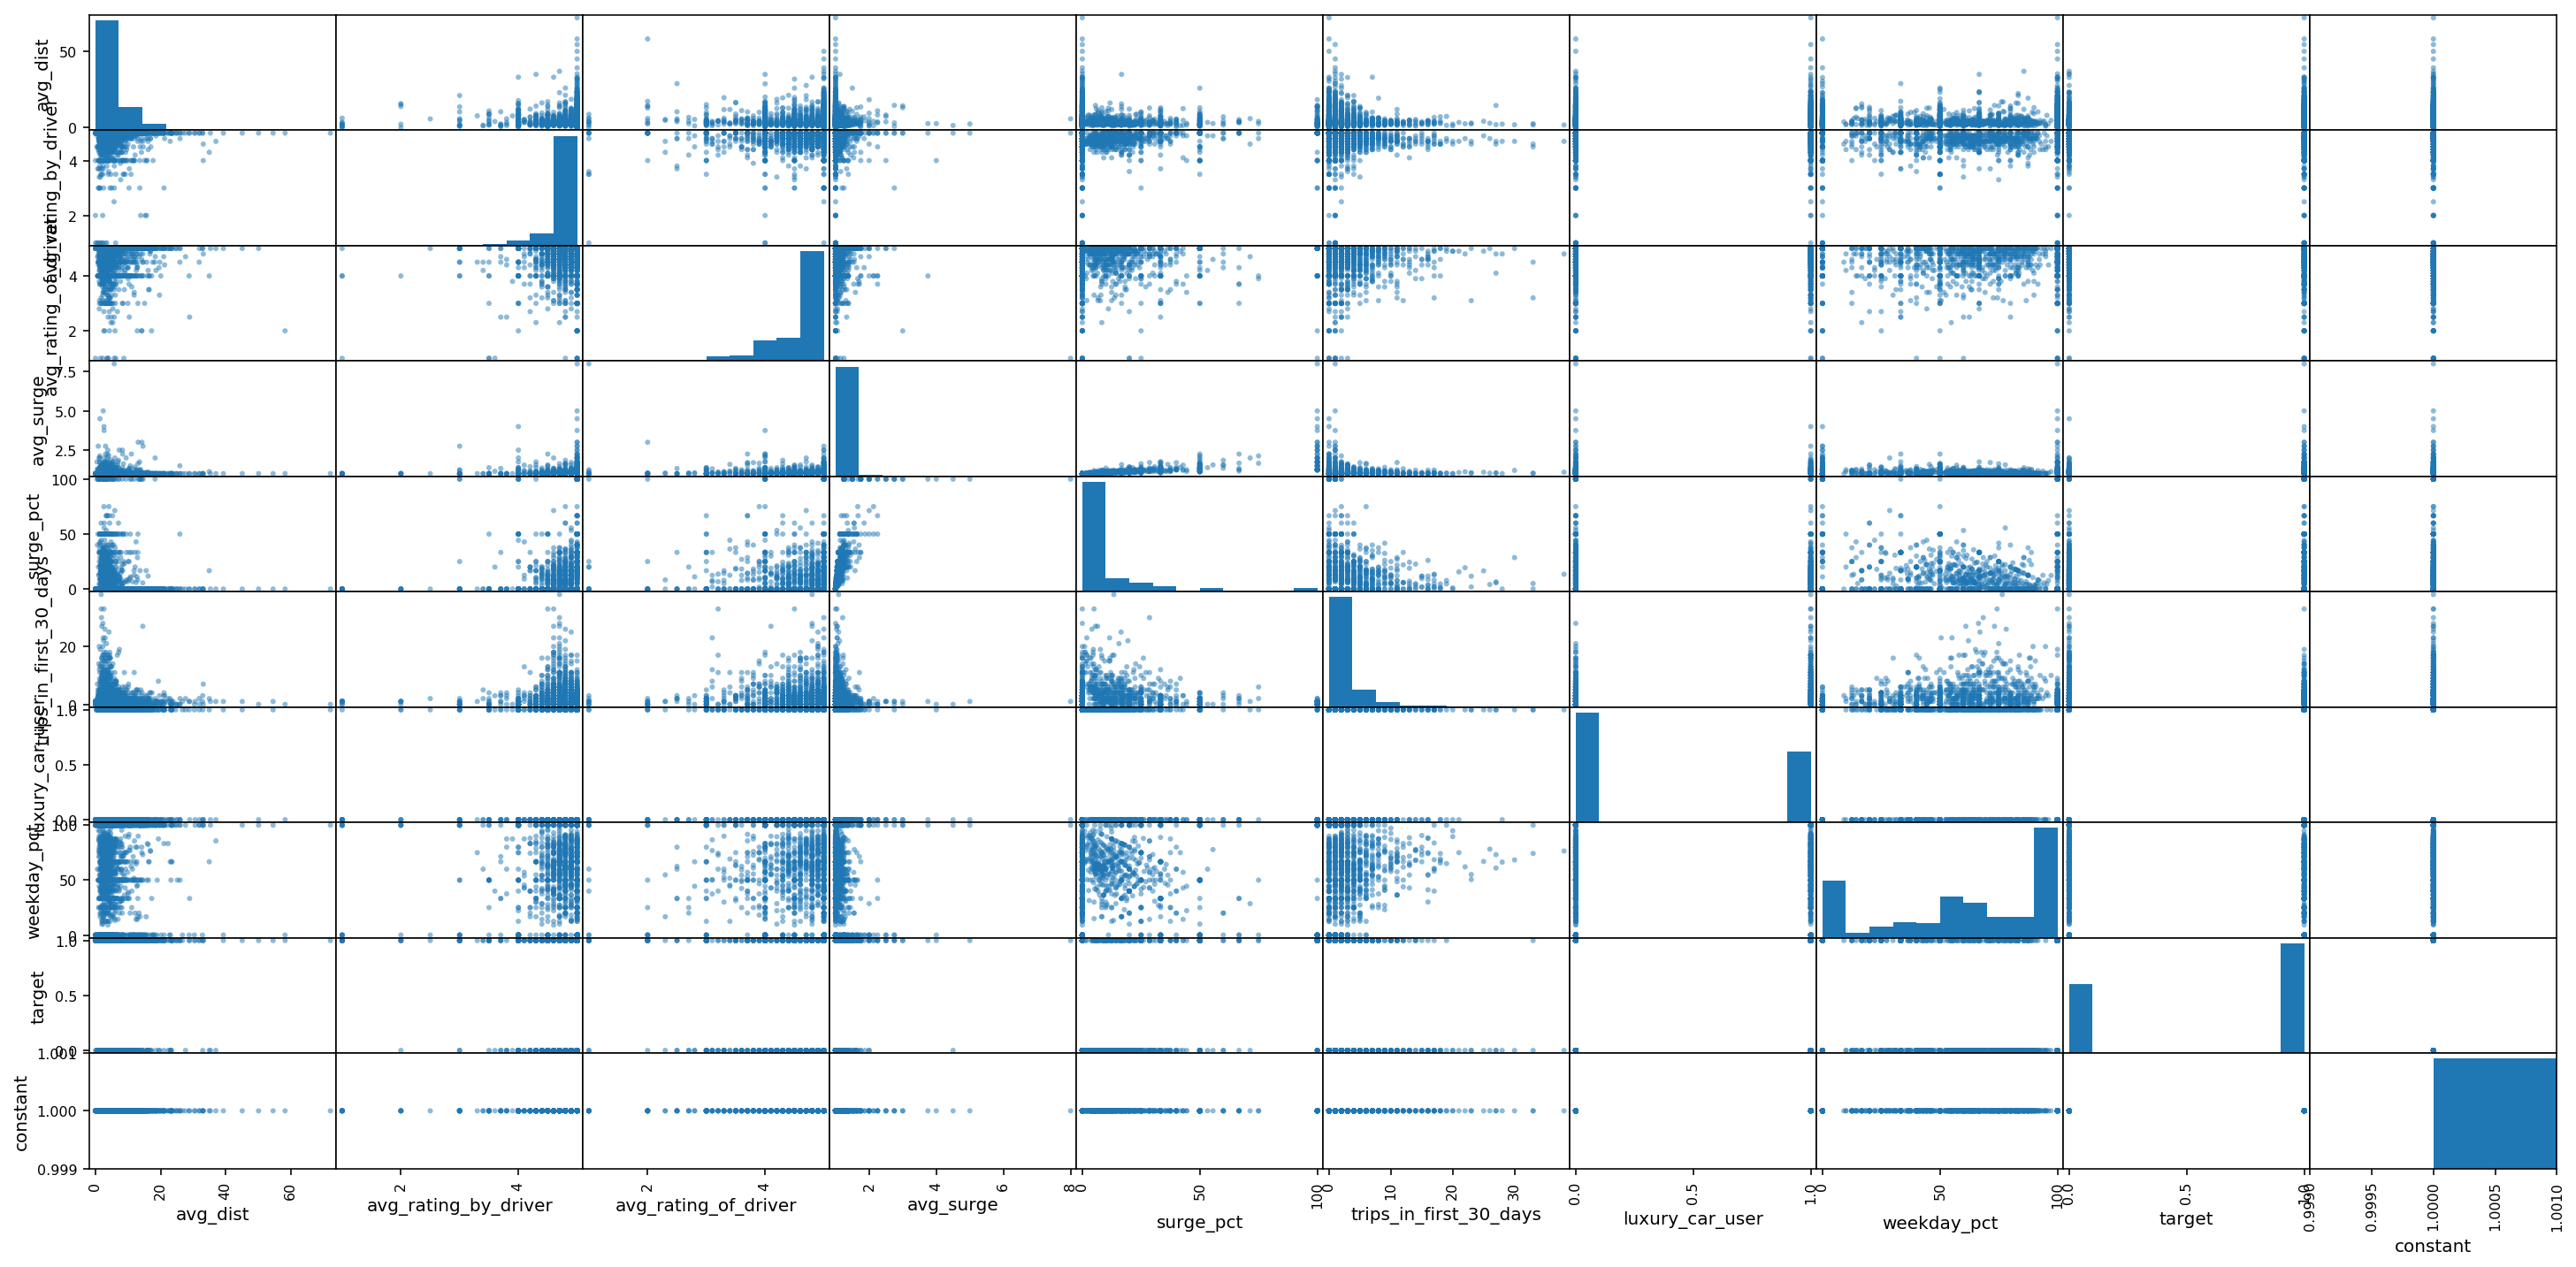

In [24]:
figure = figsize(25,12)
pd.plotting.scatter_matrix(df._get_numeric_data().sample(2000));

In [30]:
df['avg_rating_by_driver avg_rating_of_driver'.split()].corr()

,avg_rating_by_driver,avg_rating_of_driver
avg_rating_by_driver,1.000000,0.118703
avg_rating_of_driver,0.118703,1.000000


In [279]:
x_train['luxury_car_user'] = (x_train['luxury_car_user'] == 0) * 1

In [280]:
featurez=['constant','luxury_car_user', 'trips_in_first_30_days']

In [281]:
x_train_baseline = pd.DataFrame(x_train[featurez])#.join(df['constant'])

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,LTV,constant
4060,2.83,4.4,4.8,1.05,Winterfell,2014-05-18,Android,2014-01-02,20.0,0,0,40.0,0.0000,1
30943,2.04,5.0,5.0,1.00,Astapor,2014-01-15,Android,2014-01-07,0.0,1,0,100.0,2.0400,1
23588,2.75,5.0,5.0,1.00,Winterfell,2014-04-14,Android,2014-01-13,0.0,0,1,0.0,0.0000,1
36432,1.52,4.5,5.0,1.00,Winterfell,2014-06-29,iPhone,2014-01-05,0.0,2,0,0.0,3.0400,1
32360,3.85,4.8,4.0,1.06,Winterfell,2014-06-26,iPhone,2014-01-06,25.0,0,0,100.0,0.0000,1
10253,3.50,5.0,5.0,1.00,King's Landing,2014-05-24,iPhone,2014-01-18,0.0,1,1,33.3,3.5000,1
29865,5.06,5.0,NaN,1.00,Winterfell,2014-01-26,iPhone,2014-01-25,0.0,1,0,0.0,5.0600,1
34152,4.10,4.7,4.6,1.00,Winterfell,2014-06-21,iPhone,2014-01-14,0.0,3,0,66.7,12.3000,1
23404,1.43,4.7,3.5,1.00,Winterfell,2014-05-31,Android,2014-01-12,0.0,2,0,44.4,2.8600,1
31208,2.38,4.8,5.0,1.00,King's Landing,2014-06-29,iPhone,2014-01-05,0.0,1,1,25.0,2.3800,1


In [259]:
df._get_numeric_data().corr()['target'].sort_values()

trips_in_first_30_days   -0.210677
luxury_car_user          -0.206902
LTV                      -0.139029
miles                    -0.136958
surge_pct                -0.011551
weekday_pct              -0.008383
avg_surge                 0.003146
avg_rating_of_driver      0.012902
avg_rating_by_driver      0.027461
avg_ride_price            0.092459
avg_dist                  0.095971
target                    1.000000
constant                       NaN
Name: target, dtype: float64

In [260]:
x_test_baseline = pd.DataFrame(x_test[featurez])#.join(df['constant'])

In [261]:
model = LogisticRegression()
model.fit(x_train_baseline, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [262]:
y_pred = model.predict(x_test_baseline)

In [263]:
def logit_model(X_train,y_train,X_test,y_test,featurez):
    x_train_baseline = pd.DataFrame(x_train[featurez])
    x_test_baseline = pd.DataFrame(x_test[featurez])
    model = LogisticRegression()
    model.fit(x_train_baseline, y_train)
    y_pred = model.predict(x_test_baseline)
    print("accuracy i : "+ str(accuracy_score(y_pred, y_test)))
    print("precision i : "+ str(precision_score(y_pred, y_test)))
    print("recall i : "+ str(recall_score(y_pred, y_test)))
    

    fig,ax = plt.subplots(1,2, figsize = (5,5))    
    
    y_pred_prob = model.predict_proba(x_test_baseline)[:,1]
    fpr, tpr, all_thresholds = roc_curve(y_test, y_pred_prob)
#     hist(y_pred_prob)

    ax[0].hist(y_pred_prob, bins = 20)
    ax[1].plot(fpr,tpr)
    
    title('ROC Curve for College Admissions Prediction')
    grid(True)

accuracy i : 0.63225
precision i : 0.8685927306616962
recall i : 0.655678391959799


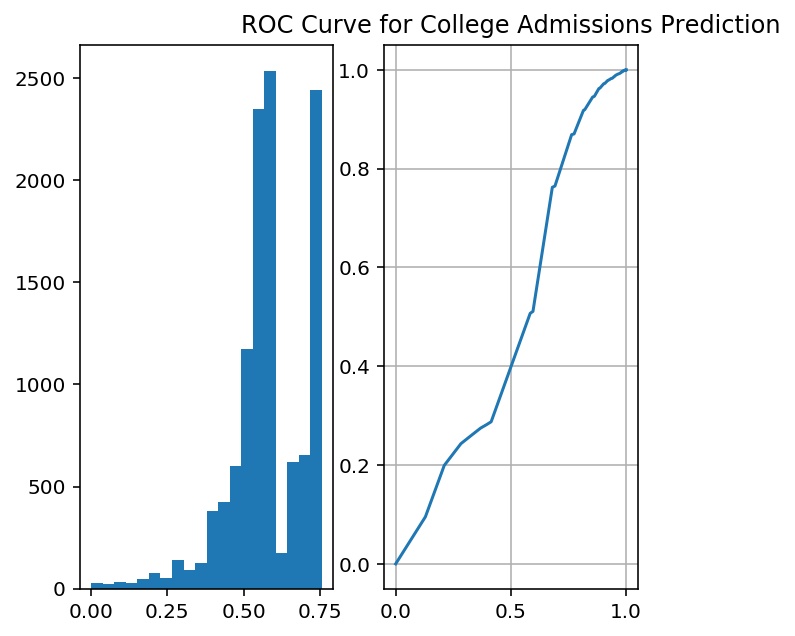

In [264]:
logit_model(x_train,y_train,x_test,y_test,featurez)